In [1]:
# https://www.tensorflow.org/
# https://docs.opencv.org/4.x/
import tensorflow as tf
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython import display

In [2]:
folder_path = os.path.basename('dataset_cleaned')
assert os.path.exists(folder_path)

In [3]:

def clahe(image):
    image = cv.GaussianBlur(image, (3, 3), 0)
    clahe = cv.createCLAHE(2, (4,4))
    (ib, ig, ir) = cv.split(image)
    image[:, :, 0], image[:, :, 1], image[:, :, 2] = clahe.apply(ib), clahe.apply(ig), clahe.apply(ir)
    return image

def clahe_gray(image):
    image = cv.GaussianBlur(image, (3, 3), 0)
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    clahe = cv.createCLAHE(2, (4,4))
    image = clahe.apply(image)
    return image
    
def detect_edges(image):
    image = cv.Canny(image, 120, 200, apertureSize=3)
    return image

def detect_contours(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.adaptiveThreshold(image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
    contours, hierarchy = cv.findContours(image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    cnt = contours[3]
    cv.drawContours(image, [cnt], 0, (0,255,0), 3)
    return image

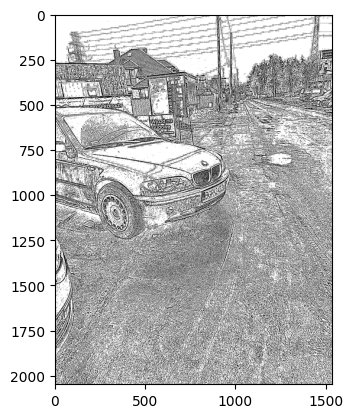

In [ ]:
def process_image(image):
    image = detect_contours(image)
    return image

def display_image(image, single: bool) -> None:
    plt.imshow(image, cmap='gray')
    # plt.imshow(image)
    if single:
        display.clear_output()
        display.display(plt.gcf())
    else:
        plt.show()
        
for image_path in os.scandir(folder_path):
    image = cv.imread(os.path.join(folder_path,image_path.name))
    
    image = process_image(image)
    
    display_image(image, True)
    
    if input() == 'q':
        break